### Maximal Independent Set

&nbsp;

An independent set (IS) is a subset of a graph such that no two vertices inside are connected. A maximal independent set (MIS) is an IS that cannot include any extra vertices without violating the definition. A maximum independent set is one of the MIS with maximum cardinality. The definition of maximal and maximum is somehow similar to clique. MIS is somewhat connected to graph coloring as well.

Reference to clique

https://github.com/je-suis-tm/graph-theory/blob/master/maximal%20clique.ipynb

Reference to graph coloring

https://github.com/je-suis-tm/graph-theory/blob/master/graph%20coloring.ipynb

In [1]:
import os
os.chdir('K:/ecole/github/televerser')
import matplotlib.pyplot as plt
import random as rd
import copy

#graph adt
#check the below link for more details
# https://github.com/je-suis-tm/graph-theory/blob/master/graph.py
import graph

### Graph ADT

In [2]:
#create graph adt
#exactly the same adt in kcore, maximal clique and graph coloring
ADT=graph.graph()
ADT.append(1,2,0)
ADT.append(1,3,0)
ADT.append(1,4,0)
ADT.append(1,6,0)
ADT.append(2,1,0)
ADT.append(3,1,0)
ADT.append(4,1,0)
ADT.append(6,1,0)

ADT.append(2,3,0)
ADT.append(2,4,0)
ADT.append(2,6,0)
ADT.append(3,2,0)
ADT.append(4,2,0)
ADT.append(6,2,0)

ADT.append(3,4,0)
ADT.append(3,7,0)
ADT.append(4,3,0)
ADT.append(7,3,0)

ADT.append(4,5,0)
ADT.append(5,4,0)

ADT.append(5,6,0)
ADT.append(6,5,0)

In [3]:
ADT.reveal()

{1: {2: 0, 3: 0, 4: 0, 6: 0},
 2: {1: 0, 3: 0, 4: 0, 6: 0},
 3: {1: 0, 2: 0, 4: 0, 7: 0},
 4: {1: 0, 2: 0, 3: 0, 5: 0},
 6: {1: 0, 2: 0, 5: 0},
 7: {3: 0},
 5: {4: 0, 6: 0}}

![alt text](./preview/kcore1.png)

### Fast Randomized Distributed MIS Algorithm

&nbsp;

There are tons of algorithms to find MIS. MIS is an NP-complete problem for computer scientists. Currently the most popular one is randomized distributed algorithm. 

Reference to the original paper in 2009

https://www.researchgate.net/publication/220567138_An_Optimal_Bit_Complexity_Randomized_Distributed_MIS_Algorithm

In [4]:
#fast mis algorithm after 2009
def get_maximal_independent_set(ADT):
    """fast randomized algorithm to fetch one of the maximal independent sets"""

    #assign random value from uniform distribution to every vertex
    random_val=dict(zip(ADT.vertex(),
        [rd.random() for _ in range(ADT.order())]))

    #initialize
    maximal_independent_set=[]
    queue=[i for i in random_val]
    
    while len(queue)>0:
        for node in queue:
            
            #select the vertex which has larger value than all of its neighbors
            neighbor_vals=[random_val[neighbor] for neighbor in ADT.edge(node) if neighbor in random_val]
            if len(neighbor_vals)==0 or random_val[node]<min(neighbor_vals):
                
                #add to mis
                maximal_independent_set.append(node)
                
                #remove the vertex and its neighbors
                queue.remove(node)
                for neighbor in ADT.edge(node):
                    if neighbor in queue:
                        queue.remove(neighbor)
        
        #reassign random values to existing vertices
        random_val=dict(zip(queue,
                            [rd.random() for _ in range(len(random_val))]))
        
    return maximal_independent_set

In [5]:
#run
mis=get_maximal_independent_set(ADT)

In [6]:
#assign coordinates for viz
coordinates={1: (0.5, 3), 2: (0.5, 1),
 3: (1.5, 2), 4: (2, 1),
 5: (1, 0), 6: (0, 0), 7: (3, 3)}

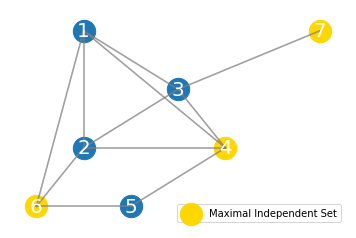

In [7]:
#plot edge
for i in ADT.vertex():
    for j in ADT.edge(i):
        plt.plot([coordinates[i][0],coordinates[j][0]],
                 [coordinates[i][1],coordinates[j][1]],c='grey',alpha=0.5)

#plot vertex
plt.scatter([coordinates[i][0] for i in coordinates if i in mis],
           [coordinates[i][1] for i in coordinates if i in mis],
           s=500,label="Maximal Independent Set",c='gold')
plt.scatter([coordinates[i][0] for i in coordinates if i not in mis],
           [coordinates[i][1] for i in coordinates if i not in mis],
           s=500)

#plot vertex label
for i in coordinates:
    plt.text(coordinates[i][0],coordinates[i][1],i,
             va='center',ha='center',color='white',fontsize=20)

#tidy up the chart
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

### Ramsey Algorithm

&nbsp;

Finding maximal independent set is NP-complete but finding maximum independent set (MaxIS) is NP-hard. Intuitively, the easiest way to find a MaxIS is a brute force algorithm to select MaxIS from all the MIS. `NetworkX` prefers Ramsey algorithm to approximate MaxIS. Thus, it is worth the effort to make a little introduction here as well.

Reference to `NetworkX`

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.independent_set.maximum_independent_set.html#networkx.algorithms.approximation.independent_set.maximum_independent_set

Reference to the original paper
 https://www.researchgate.net/publication/227294736_Approximating_Maximum_Independent_Sets_by_Excluding_Subgraphs

In [8]:
#choice of networkx
def ramsey(graph_adt):
    """Ramsey algorithm to approximate the maximum independent set"""

    #base case of the recursion
    if graph_adt.order()==0:
        return []
    
    #select a random vertex
    #this can be optimized by selecting the vertex with the smallest degree
    selected=graph_adt.vertex()[0]

    #find its neighbors and non neighbors
    neighbors=graph_adt.edge(selected)
    non_neighbors=[i for i in graph_adt.vertex() if i not in neighbors and i!=selected]

    #create a subset which only contains its neighbors
    subset_neighbors=copy.deepcopy(graph_adt)
    for vertex in non_neighbors:
        subset_neighbors.remove(vertex)
    subset_neighbors.remove(selected)

    #create a subset which only contains its non neighbors
    subset_non_neighbors=copy.deepcopy(graph_adt)
    for vertex in neighbors:
        subset_non_neighbors.remove(vertex)
    subset_non_neighbors.remove(selected)
        
    #recursively check other vertices
    neighbors_mis=ramsey(subset_neighbors)
    non_neighbors_mis=ramsey(subset_non_neighbors)
    
    #add to approximated maximum independent set
    non_neighbors_mis.append(selected)

    #only export the larger set between the two
    return max(neighbors_mis,non_neighbors_mis,key=len)

In [9]:
#run
approximation=ramsey(ADT)

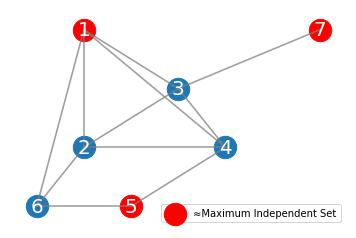

In [10]:
#plot edge
for i in ADT.vertex():
    for j in ADT.edge(i):
        plt.plot([coordinates[i][0],coordinates[j][0]],
                 [coordinates[i][1],coordinates[j][1]],c='grey',alpha=0.5)

#plot vertex
plt.scatter([coordinates[i][0] for i in coordinates if i in approximation],
           [coordinates[i][1] for i in coordinates if i in approximation],
           s=500,label="≈Maximum Independent Set",c='red')
plt.scatter([coordinates[i][0] for i in coordinates if i not in approximation],
           [coordinates[i][1] for i in coordinates if i not in approximation],
           s=500)

#plot vertex label
for i in coordinates:
    plt.text(coordinates[i][0],coordinates[i][1],i,
             va='center',ha='center',color='white',fontsize=20)

#tidy up the chart
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.legend(loc=4)
plt.show()